- integration test: call join_timeseries(base, overwrite, harmonise_linear=[])
- unit tests: 
    - read in base and overwrite, call _join_dataframes, harmonise_linear passed correctly
    - read in base and overwrite, call _join_dataframes, harmonise_linear passed correctly

- read in
- interpolate onto linear time axis
- get common flags
- update


In [1]:
from pprint import pprint
from os.path import join

import numpy as np
import pandas as pd

from pymagicc.io import MAGICCData

%matplotlib inline

In [2]:
DATA_DIR = join("..", "tests", "test_data")
DATA_MAGICC6_RUN = join("..", "pymagicc", "MAGICC6", "run")

In [3]:
rcp = MAGICCData()
rcp.read(join(DATA_DIR, "RCP3PD_EMISSIONS.DAT"))
base = rcp.df
base["todo"] = "SET"
rcp.read(join(DATA_MAGICC6_RUN, "RCP85.SCEN"))
scen = rcp.df

In [4]:
pprint(list(base["variable"].unique()))

['Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CH4',
 'Emissions|N2O',
 'Emissions|SOx',
 'Emissions|CO',
 'Emissions|NMVOC',
 'Emissions|NOx',
 'Emissions|BC',
 'Emissions|OC',
 'Emissions|NH3',
 'Emissions|CF4',
 'Emissions|C2F6',
 'Emissions|C6F14',
 'Emissions|HFC23',
 'Emissions|HFC32',
 'Emissions|HFC4310',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC227ea',
 'Emissions|HFC245fa',
 'Emissions|SF6',
 'Emissions|CFC11',
 'Emissions|CFC12',
 'Emissions|CFC113',
 'Emissions|CFC114',
 'Emissions|CFC115',
 'Emissions|CCl4',
 'Emissions|CH3CCl3',
 'Emissions|HCFC22',
 'Emissions|HCFC141b',
 'Emissions|HCFC142b',
 'Emissions|Halon1211',
 'Emissions|Halon1202',
 'Emissions|Halon1301',
 'Emissions|Halon2402',
 'Emissions|CH3Br',
 'Emissions|CH3Cl']


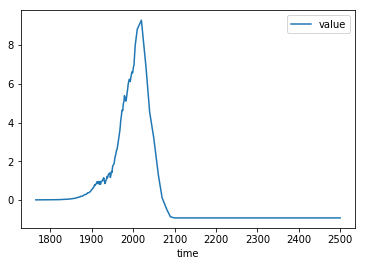

In [5]:
base[
    (base["variable"] == "Emissions|CO2|MAGICC Fossil and Industrial")
    & (base["region"] == "World")
].plot(x="time", y="value");

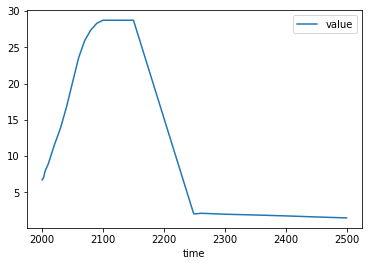

In [6]:
scen[
    (scen["variable"] == "Emissions|CO2|MAGICC Fossil and Industrial")
    & (scen["region"] == "World")
].plot(x="time", y="value");

In [7]:
scen.time.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2010, 2020, 2030,
       2040, 2050, 2060, 2070, 2080, 2090, 2100, 2125, 2150, 2248, 2249,
       2250, 2255, 2260, 2275, 2300, 2350, 2400, 2450, 2500])

In [8]:
historical = base.loc[base.time <= 2000, :].copy()
historical["todo"] = "SET"

In [9]:
historical.head()

,variable,todo,unit,region,time,value
0,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1765,0.003
1,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1766,0.003
2,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1767,0.003
3,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1768,0.003
4,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1769,0.003


In [10]:
projection = scen.loc[scen.time >= 2005, :].copy()
projection.head()

,variable,todo,unit,region,time,value
5,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2005,0.0
6,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2006,0.0
7,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2007,0.0
8,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2010,0.0
9,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2020,0.0


In [11]:
def reshape_df(in_df):
    out_df = in_df.copy()

    return out_df.groupby([
        "variable",
        "todo",
        "unit",
        "region",
        "time",
    ])["value"].max().unstack("time")


In [12]:
reshape_df(historical).head()

,,,time,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
variable,todo,unit,region,,,,,,,,,,,,,,,,,,,,,
Emissions|BC,SET,Mt BC / yr,World,0.000000,0.106998,0.133383,0.159847,0.186393,0.213024,0.239742,0.266550,0.293450,0.320446,...,7.724752,7.733646,7.742540,7.751435,7.760329,7.769223,7.778117,7.787012,7.795906,7.8048
Emissions|C2F6,SET,kt C2F6 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.372910,2.373147,2.373384,2.373621,2.373857,2.374094,2.374331,2.374568,2.374804,2.3749
Emissions|C6F14,SET,kt C6F14 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.4624
Emissions|CCl4,SET,kt CCl4 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.607000,91.022000,85.436000,77.289000,85.021000,70.403000,74.423000,84.361000,69.242000,74.1320
Emissions|CF4,SET,kt CF4 / yr,World,0.010763,0.010752,0.010748,0.010744,0.010740,0.010736,0.010731,0.010727,0.010723,0.010719,...,11.997905,11.998111,11.998354,11.998587,10.501674,11.999071,11.999322,11.999575,10.502692,12.0001


In [13]:
reshape_df(projection.loc[projection["region"] == "World", :]).head()

,,,time,2005,2006,2007,2010,2020,2030,2040,2050,2060,2070,...,2249,2250,2255,2260,2275,2300,2350,2400,2450,2500
variable,todo,unit,region,,,,,,,,,,,,,,,,,,,,,
Emissions|BC,SET,Mt BC / yr,World,8.2512,8.2076,8.1642,8.0345,7.6608,7.0434,6.1334,5.6407,5.1865,4.8553,...,4.2497,4.2497,4.2497,4.2497,4.2497,4.2497,4.2497,4.2497,4.2497,4.2497
Emissions|C2F6,SET,kt C2F6 / yr,World,2.6495,2.6000,2.5503,2.3992,2.6294,2.7754,2.7284,2.8189,2.6873,2.7527,...,0.0592,0.0592,0.0592,0.0592,0.0592,0.0592,0.0592,0.0592,0.0592,0.0592
Emissions|C6F14,SET,kt C6F14 / yr,World,0.4358,0.4427,0.4492,0.4666,0.1844,0.1118,0.1128,0.1087,0.1074,0.1066,...,0.0077,0.0077,0.0077,0.0077,0.0077,0.0077,0.0077,0.0077,0.0077,0.0077
Emissions|CF4,SET,kt CF4 / yr,World,11.6059,11.4148,11.2222,10.6344,11.7746,12.4148,12.1396,12.4908,11.7735,11.8409,...,0.0705,0.0705,0.0706,0.0706,0.0707,0.0709,0.0712,0.0714,0.0716,0.0716
Emissions|CH4,SET,Mt CH4 / yr,World,315.9027,322.1576,328.4341,347.3935,419.0660,484.2074,577.3889,676.8141,745.1740,780.1125,...,904.7895,904.8603,905.3349,905.8686,907.5502,910.0611,914.2354,917.6800,920.6400,923.1946


In [14]:
reshape_df(projection.loc[projection["region"] == "World", :]).T.reindex(range(2005, 2500))

variable,Emissions|BC,Emissions|C2F6,Emissions|C6F14,Emissions|CF4,Emissions|CH4,Emissions|CO,Emissions|CO2|MAGICC AFOLU,Emissions|CO2|MAGICC Fossil and Industrial,Emissions|HFC125,Emissions|HFC134a,...,Emissions|HFC245fa,Emissions|HFC32,Emissions|HFC4310,Emissions|N2O,Emissions|NH3,Emissions|NMVOC,Emissions|NOx,Emissions|OC,Emissions|SF6,Emissions|SOx
todo,SET,SET,SET,SET,SET,SET,SET,SET,SET,SET,...,SET,SET,SET,SET,SET,SET,SET,SET,SET,SET
unit,Mt BC / yr,kt C2F6 / yr,kt C6F14 / yr,kt CF4 / yr,Mt CH4 / yr,Mt CO / yr,Gt C / yr,Gt C / yr,kt HFC125 / yr,kt HFC134a / yr,...,kt HFC245fa / yr,kt HFC32 / yr,kt HFC4310 / yr,Mt N2ON / yr,Mt N / yr,Mt NMVOC / yr,Mt N / yr,Mt OC / yr,kt SF6 / yr,Mt S / yr
region,World,World,World,World,World,World,World,World,World,World,...,World,World,World,World,World,World,World,World,World,World
time,,,,,,,,,,,,,,,,,,,,,
2005,8.2512,2.6495,0.4358,11.6059,315.9027,1061.5255,1.1955,7.9710,13.7591,120.9334,...,26.8886,10.9934,3.2352,7.6842,41.8837,215.4629,38.7948,36.3917,6.3408,56.7195
2006,8.2076,2.6000,0.4427,11.4148,322.1576,1058.9366,1.1651,8.1616,17.9374,121.0747,...,38.6318,12.3832,3.8841,7.7780,42.2092,215.6436,38.9081,36.1913,6.4710,55.4142
2007,8.1642,2.5503,0.4492,11.2222,328.4341,1056.3789,1.1348,8.3523,22.1104,129.6222,...,50.3750,13.7729,4.5338,7.8718,42.5349,215.8292,39.0225,35.9908,6.6012,54.1117
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,8.0345,2.3992,0.4666,10.6344,347.3935,1048.8921,1.0438,8.9256,34.5984,152.5132,...,85.6048,17.9421,6.4867,8.1527,43.5127,216.4157,39.3730,35.3887,7.0443,50.2207


In [15]:
full_scen = reshape_df(base)
full_scen.update(
    reshape_df(projection[projection["region"] == "World"]).T.reindex(range(2005, 2501)).interpolate(method="values").T,
    raise_conflict=False,
)
full_scen

,,,time,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
variable,todo,unit,region,,,,,,,,,,,,,,,,,,,,,
Emissions|BC,SET,Mt BC / yr,World,0.000000,0.106998,0.133383,0.159847,0.186393,0.213024,0.239742,0.266550,0.293450,0.320446,...,4.249700,4.249700,4.249700,4.249700,4.24970,4.249700,4.249700,4.249700,4.249700,4.2497
Emissions|C2F6,SET,kt C2F6 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.059200,0.059200,0.059200,0.059200,0.05920,0.059200,0.059200,0.059200,0.059200,0.0592
Emissions|C6F14,SET,kt C6F14 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007700,0.007700,0.007700,0.007700,0.00770,0.007700,0.007700,0.007700,0.007700,0.0077
Emissions|CCl4,SET,kt CCl4 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
Emissions|CF4,SET,kt CF4 / yr,World,0.010763,0.010752,0.010748,0.010744,0.010740,0.010736,0.010731,0.010727,0.010723,0.010719,...,0.071600,0.071600,0.071600,0.071600,0.07160,0.071600,0.071600,0.071600,0.071600,0.0716
Emissions|CFC11,SET,kt CFC11 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
Emissions|CFC113,SET,kt CFC113 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
Emissions|CFC114,SET,kt CFC114 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
Emissions|CFC115,SET,kt CFC115 / yr,World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000


In [16]:
full_scen = full_scen.T
for val in range(2001, 2005):
    full_scen.loc[val] = np.nan
full_scen = full_scen.sort_index()
full_scen = full_scen.interpolate(method="values")
full_scen.loc[2095:2110, "Emissions|CO2|MAGICC Fossil and Industrial"]

todo,SET
unit,Gt C / yr
region,World
time,
2095,28.53840
2096,28.57874
2097,28.61908
2098,28.65942
2099,28.69976
2100,28.74010
2101,28.74010


In [17]:
full_scen = pd.DataFrame(
    full_scen.T.stack()
).rename({0: "value"}, axis="columns").reset_index()
full_scen.head()

,variable,todo,unit,region,time,value
0,Emissions|BC,SET,Mt BC / yr,World,1765,0.000000
1,Emissions|BC,SET,Mt BC / yr,World,1766,0.106998
2,Emissions|BC,SET,Mt BC / yr,World,1767,0.133383
3,Emissions|BC,SET,Mt BC / yr,World,1768,0.159847
4,Emissions|BC,SET,Mt BC / yr,World,1769,0.186393


In [18]:
full_scen[
    (full_scen["variable"] == "Emissions|CO2|MAGICC Fossil and Industrial")
    & (full_scen["time"] > 2097)
]

,variable,todo,unit,region,time,value
12109,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2098,28.659420
12110,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2099,28.699760
12111,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2100,28.740100
12112,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2101,28.740100
12113,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2102,28.740100
12114,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2103,28.740100
12115,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2104,28.740100
12116,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2105,28.740100
12117,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2106,28.740100
12118,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,2107,28.740100


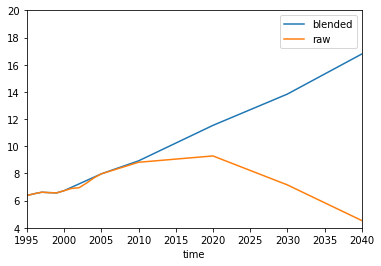

In [26]:
ax = full_scen[
    full_scen["variable"] == "Emissions|CO2|MAGICC Fossil and Industrial"
].plot(x="time", y="value", label="blended")
base[
    (base["variable"] == "Emissions|CO2|MAGICC Fossil and Industrial")
    & (base["region"] == "World")
].plot(x="time", y="value", label="raw", ax=ax)
ax.set_xlim([1995, 2040])
ax.set_ylim([4, 20]);